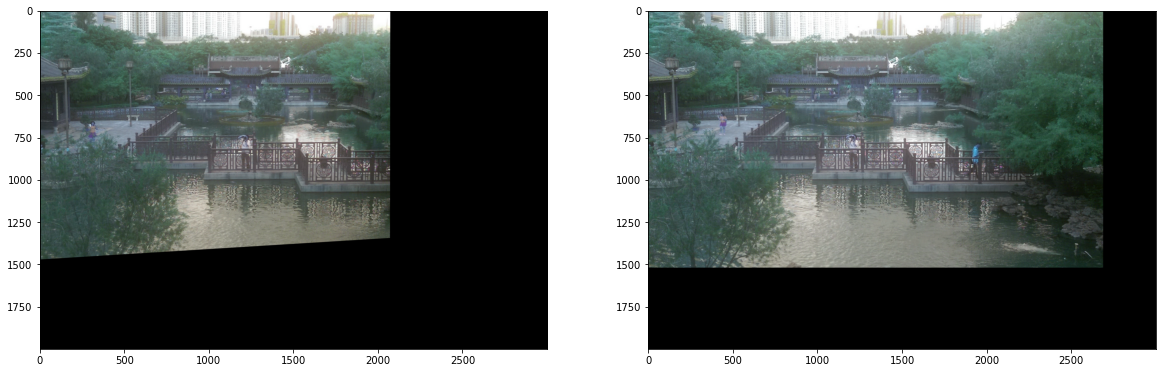

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy.io as sio
%matplotlib inline

window_name='stitch'

img1 = cv2.imread('IMAG4689.jpg')
img2 = cv2.imread('IMAG4688.jpg')


h = np.array([[ 1.55045419e-03,  3.02183837e-05, -9.78825638e-01],
       [ 2.78294686e-05,  1.46986982e-03, -2.04680411e-01],
       [ 8.37118544e-08,  1.54795992e-08,  1.31648165e-03]])
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(cv2.warpPerspective(img1,h,(3000,2000)))
plt.subplot(1,2,2)
plt.imshow(cv2.warpPerspective(img2,np.eye(3),(3000,2000)))


## Q1a. (10 points) Create a stitching function that stitches img1 and img2 together by completing the following function 

In [3]:
def stitch_images(img1,img2,h1,h2,fs):
# Input    
#     img1: first image
#     img2: second image
#     h1: projective transform for img1
#     h2: projective transform for img2
#     fs: size of the output image
# Output
#     return img of size fs
    pass 

In [6]:
plt.figure(figsize=(15,15))
h1=h
h2=np.eye(3)
plt.imshow(stitch_images(img1,img2,h1,h2,(3000,2000)))

#### You should get something like the above running the code. Note that stitching is not apparent because the first image is shifted up and left and being cropped off.

## Q1b. Extra credit (5 points) Automatically determine the output image size and an appropriate translation so that everything is shown

In [ ]:
def get_shift_and_output_size(h1,h2,imsize)
# # Input
#     h1: transform for img1
#     h2: transform for img2
#     imsize: original image size
# # Output
#     T: translation matrix (Identity if no shift is necessary)
#     outsize: expected image size after stitching (should be a pair of integers)
    pass

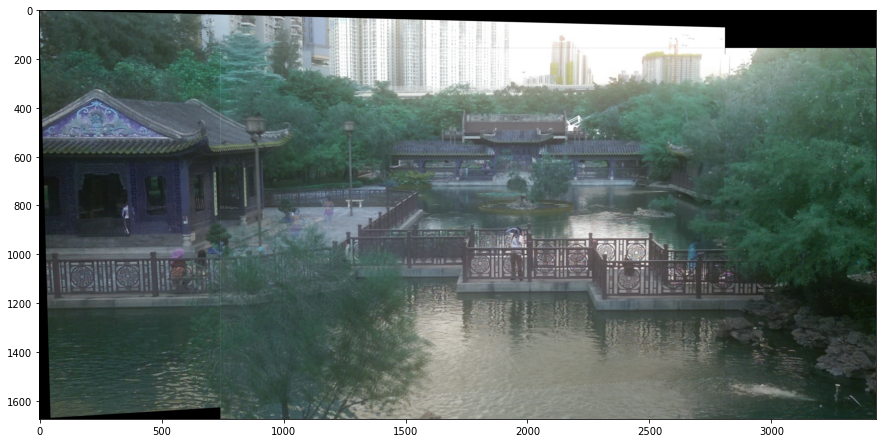

In [7]:
T, fs = get_shift_and_output_size(h1,h2,img1.shape)
plt.figure(figsize=(15,15))
plt.imshow(stitch_images(img1,img2,T@h1,T@h2,fs))

## Q2. (10 points) Find homography and test on your *own images*

In [ ]:
# implement these function
def myFindHomography(match_xy):
# Input
#     match_xy: 
#         first two columns: (x,y)-values in the original image
#         second two columns: (x,y)-values in the target image
# # Output
#     h: return homography of transforming from original to target frame
    pass

## Extra credit (5 points): implement Ransac to improve homography

In [183]:
# implement this function (Extra credit: +50%)
def myRANSAC(match_xy, K):
# Input
#     match_xy: (same as myFindHomography)
#         first two columns: (x,y)-values in the original image
#         second two columns: (x,y)-values in the target image
#     K: number of trials
# # Output
#     h: return the best homography of transforming from original to target frame
    pass

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy.io as sio
%matplotlib inline

# PLEASE REPLACE WITH YOUR OWN IMAGES HERE
img1 = cv2.imread('IMAG4689.jpg')
img2 = cv2.imread('IMAG4688.jpg')

desc = cv2.xfeatures2d.SIFT_create()

ratio_thresh = 0.6

kps1, descs1 = desc.detectAndCompute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY), None)
kps2, descs2 = desc.detectAndCompute(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY), None)
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descs1, descs2, 2)

good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)  

print(len(good_matches))
match_xy=np.array([[*(kps1[q.queryIdx].pt),*(kps2[q.trainIdx].pt)] for q in good_matches])
# sio.savemat('match_xy',{'match_xy':match_xy}) # save index to matlab format

# match_xy is a matrix with each row equals x1,y1,x2,y2,
# where (x1,y1) and (x2,y2) are matched coordinates in img1 and img2, respectively



959


In [9]:
# Test Q2a here 
h1 = myFindHomography(match_xy)
h2 = np.eye(3)
plt.figure(figsize=(15,15))
plt.imshow(stitch_images(img1,img2,h1,h2,(3000,2000)))

In [10]:
# Test Q2a here if you have implemented Q1b
h1 = myFindHomography(match_xy)
h2 = np.eye(3)
T, fs = get_shift_and_output_size(h1,h2,img1.shape)
plt.figure(figsize=(15,15))
plt.imshow(stitch_images(img1,img2,T@h1,T@h2,fs))

In [11]:
# Test 2b here 
h1 = myRANSAC(match_xy,100)
h2 = np.eye(3)
plt.figure(figsize=(15,15))
plt.imshow(stitch_images(img1,img2,h1,h2,(3000,2000)))

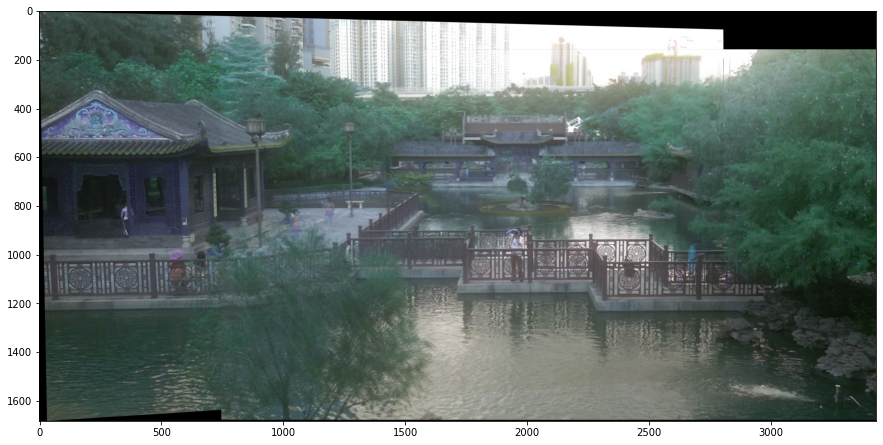

In [12]:
# Test Q2b here if you have implemented Q1b
h1 = myRANSAC(match_xy,100)
h2 = np.eye(3)
T, fs = get_shift_and_output_size(h1,h2,img1.shape)
plt.figure(figsize=(15,15))
plt.imshow(stitch_images(img1,img2,T@h1,T@h2,fs))